# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  20 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  60 баллов
* Задача 4 &mdash;  30 баллов





-----

In [ ]:
# Bot check

# HW_ID: phds_hw11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import scipy.stats as sps
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# возможно придется что-то добавить)

## <b><font color="blue">Легкая часть</font></b>

## Задача 1

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте и поясните свой ответ на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

**Ответ:**

1. Монотонные функции от одного признака не изменят структуру разбиения в дереве, поскольку дерево делает разбиение по пороговым значениям признаков. Такие преобразования обычно не имеют смысла.

2. Немонотонные функции могут быть полезны, если есть особенности в данных, которые можно выделить таким образом. Например, использование модуля значения признака может быть полезно, если абсолютное значение признака важнее его направления.

3. Применение линейных функций от нескольких признаков может привести к созданию новых линейных комбинаций признаков, что может упростить структуру дерева и улучшить его интерпретируемость.

4. Нелинейные функции от нескольких признаков могут помочь выделить сложные взаимодействия между признаками, что может улучшить способность дерева выявлять сложные закономерности в данных.

5. Стандартизация признаков перед построением дерева решений обычно не имеет смысла, так как дерево не зависит от масштаба признаков.

6. Преобразования категориальных признаков могут быть полезны, если модель не умеет работать с ними напрямую. Однако, если модель способна обрабатывать категориальные признаки, дополнительное преобразование может быть излишним.

## Задача 2

### 1. Загрузка и предобработка данных.
### *Профиль физика*



Скачайте [данные](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification) по классификации кристаллических решеток. Целевой переменной в этой задаче является `Lowest distortion`.



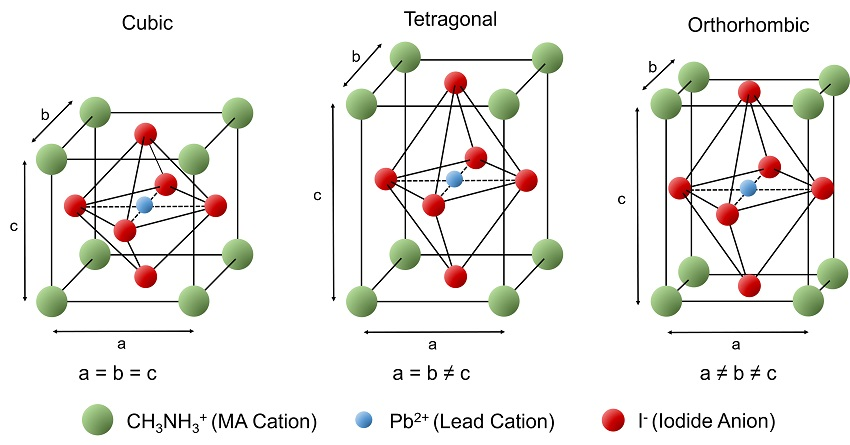


Каждое наблюдение описывается 13 столбцами признаков и 1 столбцом класса, который идентифицирует его как кубическую, тетрагональную, ромбическую или ромбоэдрическую структуру. Наборы признаков - различные параметры кристаллической решетки, такие как валентность, ионный радиус, среднее значение электроотрицательности, постоянная решетки, а так же энергия, которая численно равна работе, которую необходимо затратить, чтобы разделить и отделить друг от друга на бесконечное расстояние частицы.

In [ ]:
data = pd.read_csv("/content/Crystal_structure.csv")

Сделаем предобработку данных.

In [ ]:
# уберем признаки, которые нам не нужны (подробнее можете почиать во вкладке 'Code' на странице датасета)
data = data.drop(["In literature", "Compound", "τ"], axis=1)
# убираем объекты, для которых неизвестен таргет
data = data.drop(data[data["Lowest distortion"] == "-"].index).reset_index(drop=True)
# закодируем целевую переменную числами
data['Lowest distortion'] = LabelEncoder().fit_transform(data['Lowest distortion'])
# закодируем категориальные признаки числами
data['A'] = LabelEncoder().fit_transform(data['A'])
data['B'] = LabelEncoder().fit_transform(data['B'])
# обработаем пропуски
for i in data.columns:
    column = data[i]
    for k in range(len(column)):
        if column[k] == '-':
            column[k] = 0
    data[i] = column

### *Профиль биология*

В этом [наборе данных](https://www.kaggle.com/datasets/arezaei81/heartcsv) содержится различная информация о пациентах, включая возраст, пол, артериальное давление, уровень холестерина, электрокардиографические характеристики (ЭКГ) и многое другое. Целевой характеристикой является `target` - наличие у пациента сердечного заболевания.



Информация о наборе данных:

1. **age**: Возраст пациента.
2. **sex**: Пол пациента (0: женский, 1: мужской).
3. **cp**: Тип боли в груди.
4. **trestbps**: Артериальное давление в состоянии покоя.
5. **chol**: уровень холестерина в сыворотке крови.
6. **fbs**: Быстрый сахар крови > 120 мг/дл.
7. **restecg**: Результаты электрокардиографии в состоянии покоя.
8. **thalach**: Максимальная достигнутая частота сердечных сокращений.
9. **exang**: Стенокардия, вызванная физической нагрузкой.
10. **oldpeak**: Депрессия ST, вызванная физической нагрузкой по сравнению с покоем.



In [ ]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Обучение модели


Создайте массив признаков и массив таргета.

In [ ]:
X = heart.drop('target', axis = 1)
y = heart['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Обучите модель решающего дерева.

In [ ]:
dt_model = DecisionTreeClassifier(max_depth = 10, random_state = 108)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=108)

Сделайте предсказание для тестовой выборки.

In [ ]:
y_pred_dt = dt_model.predict(X_test)

Создайте массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [ ]:
success_dt = (y_pred_dt == y_test).astype(np.int32)
p = success_dt.mean()
p

0.7540983606557377

Вы получили выборку из распределения $Bern(\theta)$. Постройте доверительный интервал для $\theta$.

In [ ]:
alpha = 0.95
z = sps.norm.ppf((1 + alpha)/2)
n = len(success_dt)

l = p - z * np.sqrt(p * (1 - p) / n)
r = p + z * np.sqrt(p * (1 - p) / n)

(l.round(4), r.round(4))

(0.646, 0.8622)

Повторите все шаги для случайного леса. Сравните полученные интервалы.

Обучим модель случайного леса.

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

Сделаем предсказание для тестовой выборки.

In [ ]:
y_pred = forest.predict(X_test)

Создадим массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [ ]:
res = (y_pred == y_test).astype(np.int32)
p = res.mean()

Получили выборку из распределения $Bern(\theta)$. Построим доверительный интервал для $\theta$.

In [ ]:
alpha = 0.95
z = sps.norm.ppf(1 - alpha/2)
n = len(res)

l = p - z * np.sqrt(p * (1 - p) / n)
r = p + z * np.sqrt(p * (1 - p) / n)

(l.round(4), r.round(4))

(0.8331, 0.839)

**Выводы:**

Интервал для случайного леса значительно уже, что указывает на более уверенные прогнозы модели. Таким образом, в данной задаче случайный лес показал более высокую точность и более уверенные результаты по сравнению с решающим деревом.

## <b><font color="orange">Сложная часть</font></b>
## Задача 3
### 1. Загрузка данных
### *Профиль физика*

Рассмотрим <a href='https://archive.ics.uci.edu/dataset/291/airfoil+self+noise' target="_blank">набор данных НАСА</a>, он включает в себя аэродинамические профили NACA-0012 разных размеров при различных параметрах в аэродинамической трубе и углах атаки. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. Целевой переменной будет scaled-sound-pressure: это звуковое давление в определенной части лопасти, распределение этой величины показано на втором рисунке. Данная задача конечно имеет почти аналитическое решение, однако оно занимает довольно много времени и ресурсов. Мы хотим продемострировать возможность использования лесов для быстрых и довольно точных численных оценок.



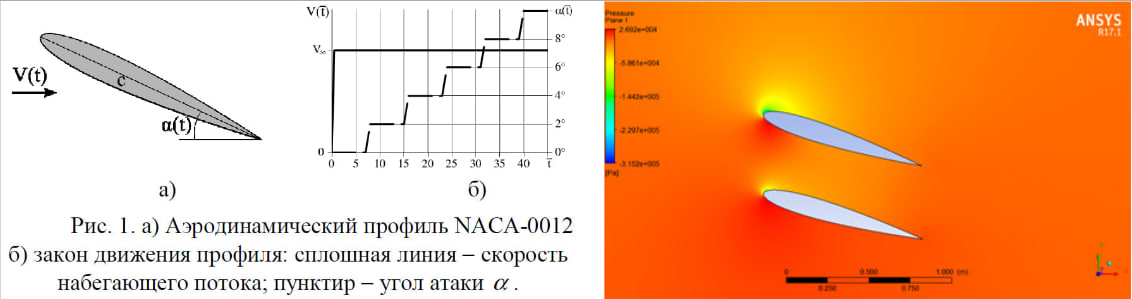

In [ ]:
column_names = ['frequency', 'attack-angle', 'chord-length', 'free-stream-velocity', "suction-side-displacement-thickness", "scaled-sound-pressure"]
df = pd.read_csv("/content/airfoil_self_noise.dat", sep='\t', names=column_names)

In [ ]:
df = df.rename(columns={'scaled-sound-pressure': 'target'})
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
X = df.drop('target',axis=1)
y = df[['target']]

In [ ]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

### *Профиль биология*

[Данные](https://archive.ics.uci.edu/dataset/1/abalone). Будем предсказывать возраст моллюсков.

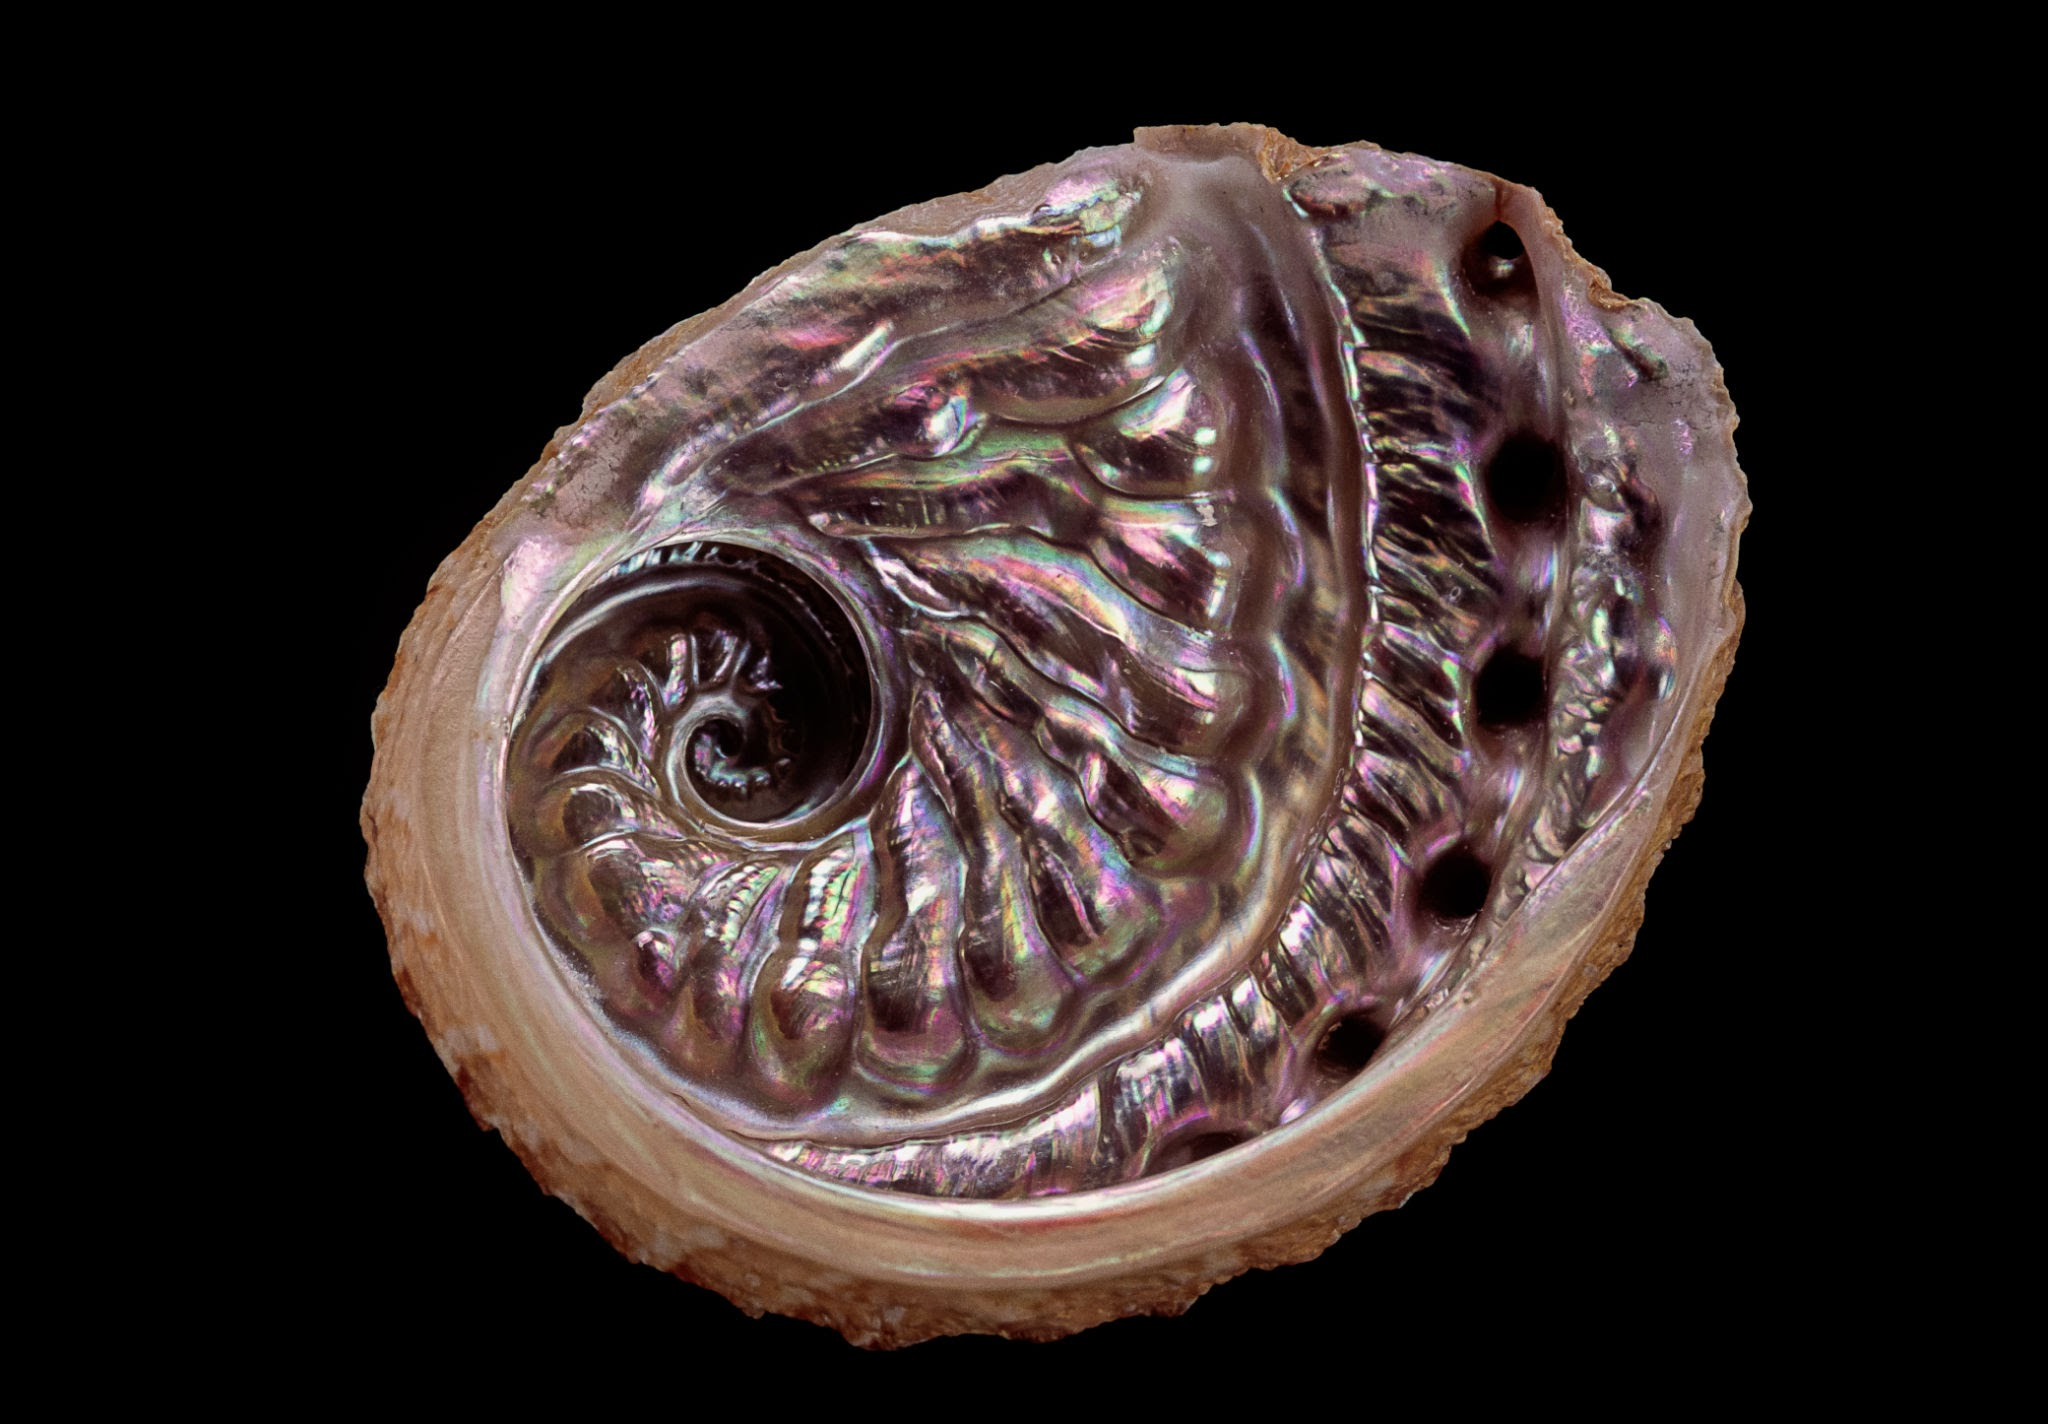

In [ ]:
data = pd.read_csv('abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                                          'Shucked weight', 'Viscera weight', 'Shell weight',
                                          'Rings'])

In [ ]:
data = data.drop('Sex', axis=1)
X = data.drop('Rings', axis=1)
y = data['Rings'] + 1.5

In [ ]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size = 0.2, random_state=42)

### 2. Обучение модели

Обучите решающее дерево глубины 3 и визуализируйте его.

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

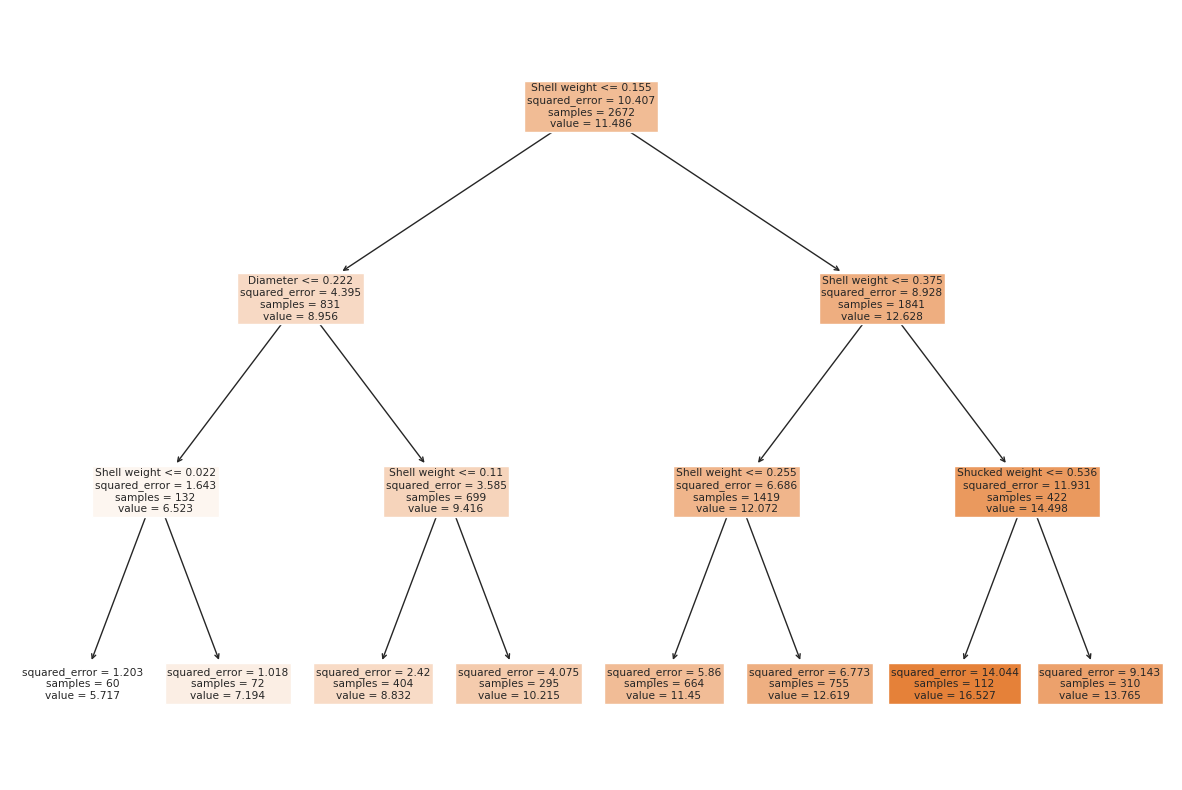

In [84]:
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize = (15, 10))
plot_tree(tree, feature_names = X.columns, filled = True)
plt.show()

Посчитайте выбранную метрику на валидационной выборке.

In [85]:
y_pred_valid = tree.predict(X_valid)

mse = mean_squared_error(y_valid, y_pred_valid)

print("MSE на валидационной выборке:", mse.round(3))

MSE на валидационной выборке: 5.749


Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график - зависиость ошибки от максимальной глубины дерева. Подробнее про гиперпараметры смотрите в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

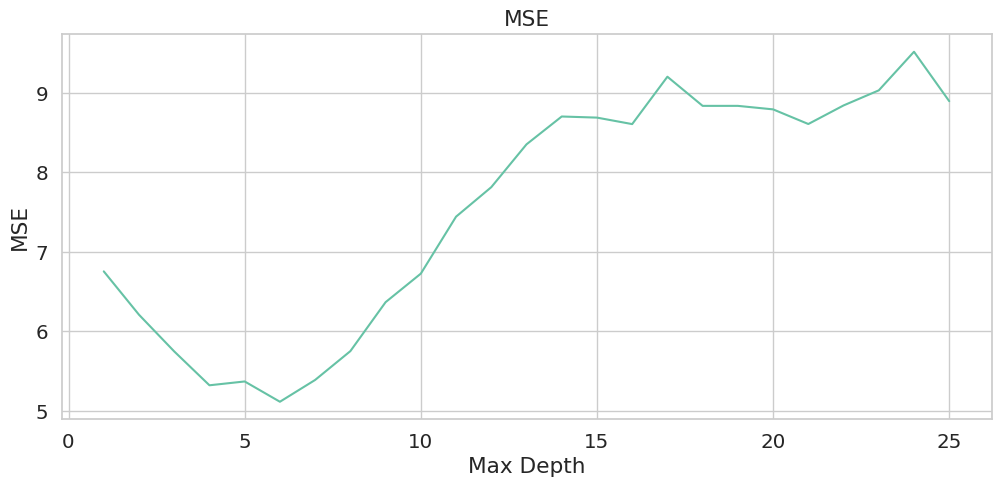

In [ ]:
max_depths = np.arange(25) + 1
mse = []

for max_depth in max_depths:
    tree = DecisionTreeRegressor(random_state = 42, max_depth = max_depth)
    tree.fit(X_train, y_train)

    # Сделаем предсказание на валидационной выборке
    y_pred = tree.predict(X_valid)

    # Посчитаем метрики и сохраним их
    mse.append(mean_squared_error(y_valid, y_pred))

plt.figure(figsize = (12, 5))

plt.plot(max_depths, mse)

plt.title('MSE')
plt.xlabel('Max Depth')
plt.ylabel('MSE')

plt.grid(True)
plt.show()

**Ответ:**

Для определения оптимальной глубины дерева, выбирем значение, при котором ошибка на валидационной выборке минимальна, т.е. 7 в нашем случае.

Аналогичным образом подберите минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться, зафиксировав при этом подобранное значение максимальной глубины. Для минимального числа объектов в листе и максимального число признаков, по которым ищется лучшее разбиение в дереве, подберите аналогично, фиксируя лучшие значения гиперпараметров, подобранные на предыдущем шаге.

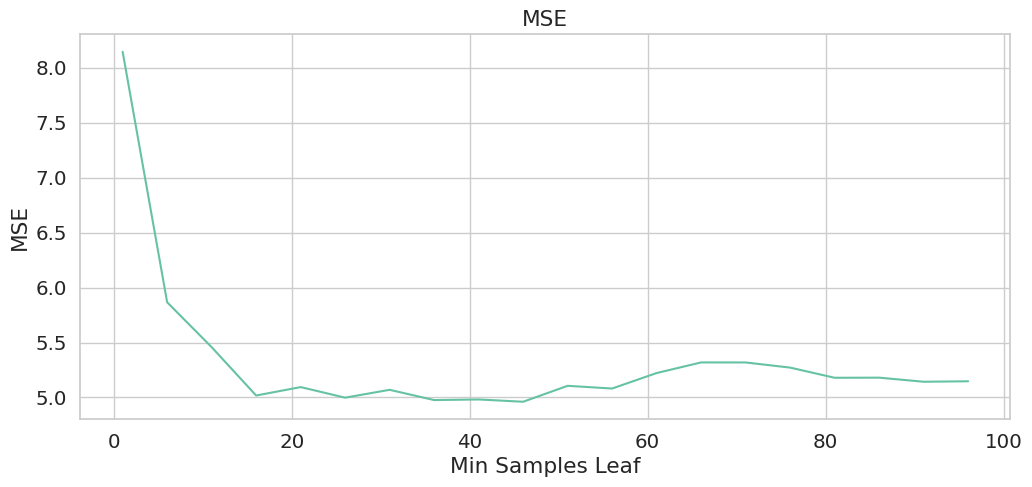

In [ ]:
min_leafs = np.arange(1, 101, 5)
mse = []

for i, min_leaf in enumerate(min_leafs):
    tree = DecisionTreeRegressor(random_state = 2, max_depth = 15, min_samples_leaf = min_leaf)
    tree.fit(X_train, y_train)

    # Сделаем предсказание
    y_pred = tree.predict(X_valid)

    # Посчитаем метрики и сохраним их
    mse.append(mean_squared_error(y_valid, y_pred))

plt.figure(figsize = (12, 5))

plt.plot(min_leafs, mse)

plt.title('MSE')
plt.xlabel('Min Samples Leaf')
plt.ylabel('MSE')

plt.grid(True)
plt.show()

**Ответ:**

Аналогичным образом выберем минимальное число объектов в листе исходя из минимума ошибки, т.е. min_samples_leaf = 20.

Обучите вашу лучшую модель и сделайте предсказание для тестовой выборки.

In [ ]:
best_tree = DecisionTreeRegressor(max_depth = 7, min_samples_leaf = 20, random_state = 42)

best_tree.fit(X_train, y_train)
y_pred_test = best_tree.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)

print("MSE на тестовой выборке:", mse_test.round(3))

MSE на тестовой выборке: 5.293


Теперь вам предлагается проверить результат своей реализации с уже существующей функцией для оптимизации гиперпараметров - `GridSearchCV`. Эта функция помогает перебирать предопределенные гиперпараметры и подгонять вашу модель к тренировочному набору. Сравните полученные гиперпараметры и если они различаются, объясните почему. Для этого вам может понадобится [документация](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
param_grid = {
    'max_depth': range(1, 11),
    'min_samples_leaf': range(1, 51, 5)
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state = 42), param_grid, cv = 5, scoring = 'neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

Лучшие гиперпараметры: {'max_depth': 8, 'min_samples_leaf': 21}


Посчитатайте метрику на тестовой выборке и взуализируйте деревья при оптимальных гиперпараметрахдля двух оптимальных моделей - вашей и GridSearchCV.

**Ваша модель**

MSE на тестовой выборке: 5.293


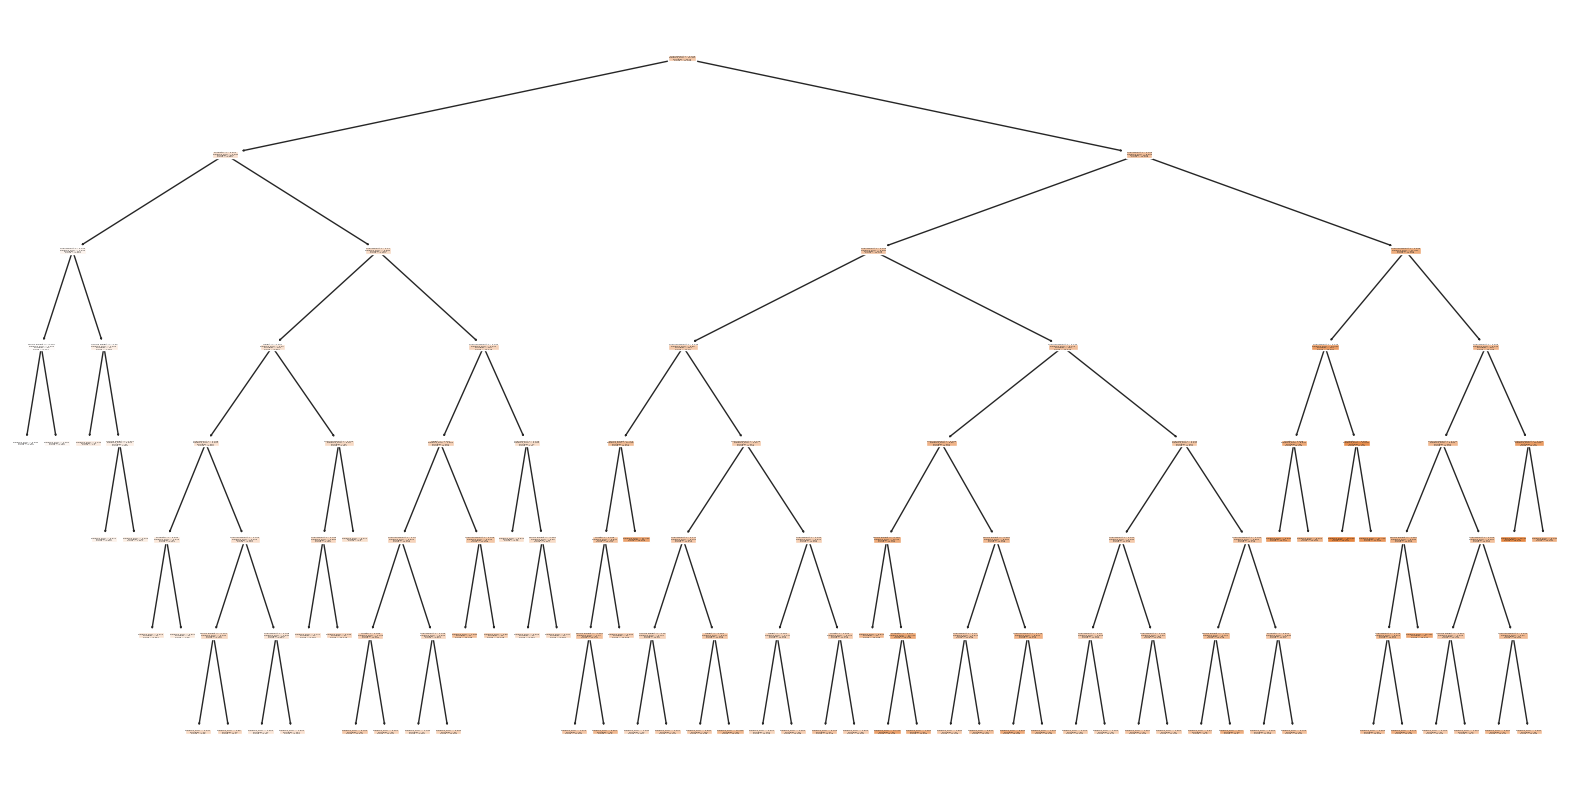

In [ ]:
my_tree = DecisionTreeRegressor(max_depth = 7, min_samples_leaf = 20, random_state = 42)

my_tree.fit(X_train, y_train)
y_pred_test = best_tree.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)

print("MSE на тестовой выборке:", mse_test.round(3))

plt.figure(figsize = (20, 10))
plot_tree(my_tree, feature_names = X.columns, filled = True)
plt.show()

**Лучшая модель по мнению GridSearchCV**

MSE на тестовой выборке (GridSearchCV): 5.468


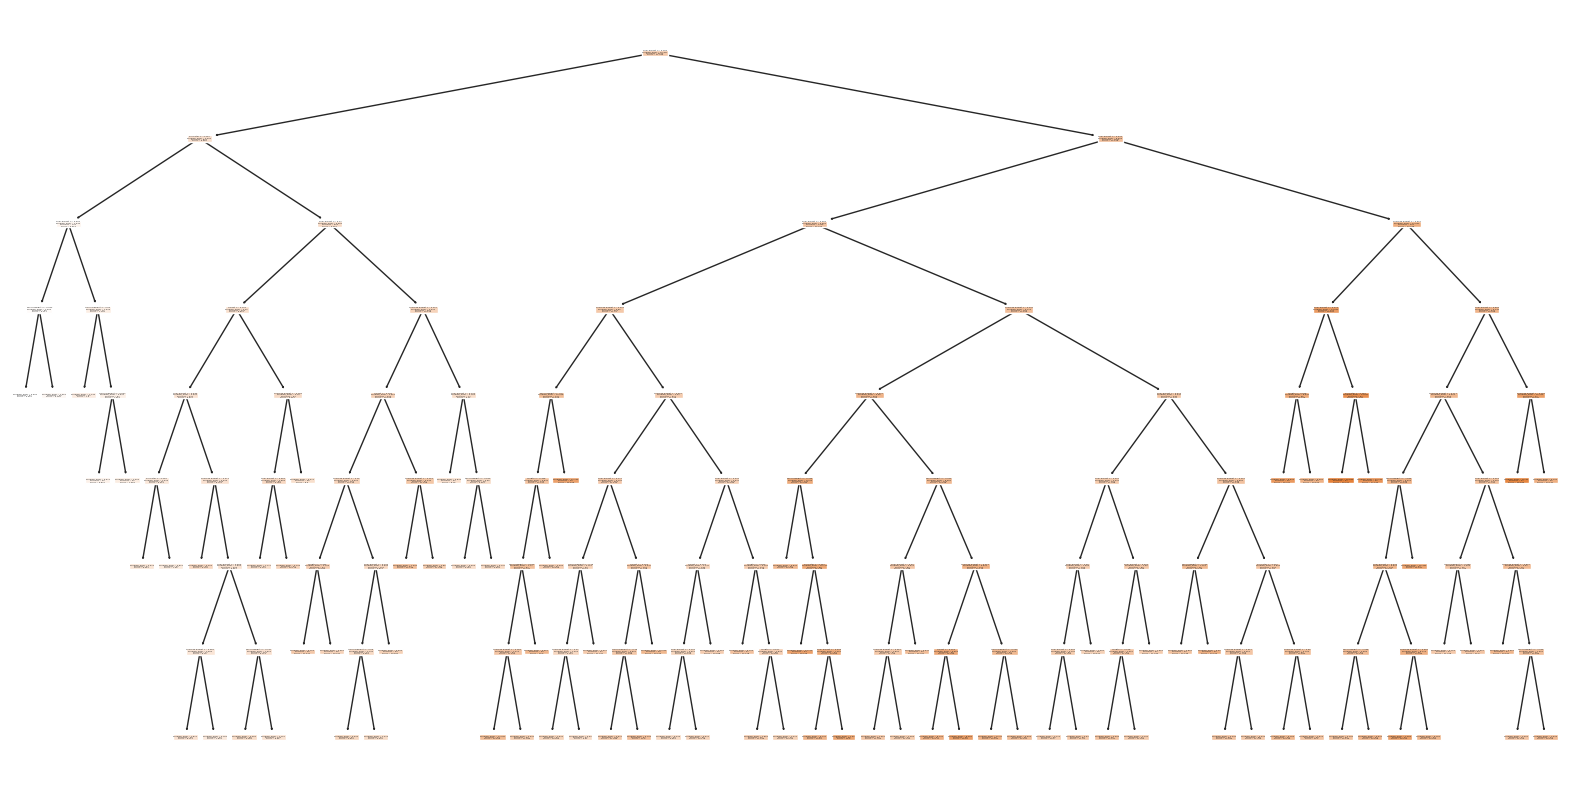

In [ ]:
best_model_gridsearch = grid_search.best_estimator_

y_pred_CV = best_model_gridsearch.predict(X_test)

mse_gridsearch = mean_squared_error(y_test, y_pred_CV)

print("MSE на тестовой выборке (GridSearchCV):", mse_gridsearch.round(3))

plt.figure(figsize = (20, 10))
plot_tree(best_model_gridsearch, feature_names = X.columns, filled = True)
plt.show()

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа,
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их на одном графике с помощью `seaborn.barplot` для обеих моделей.

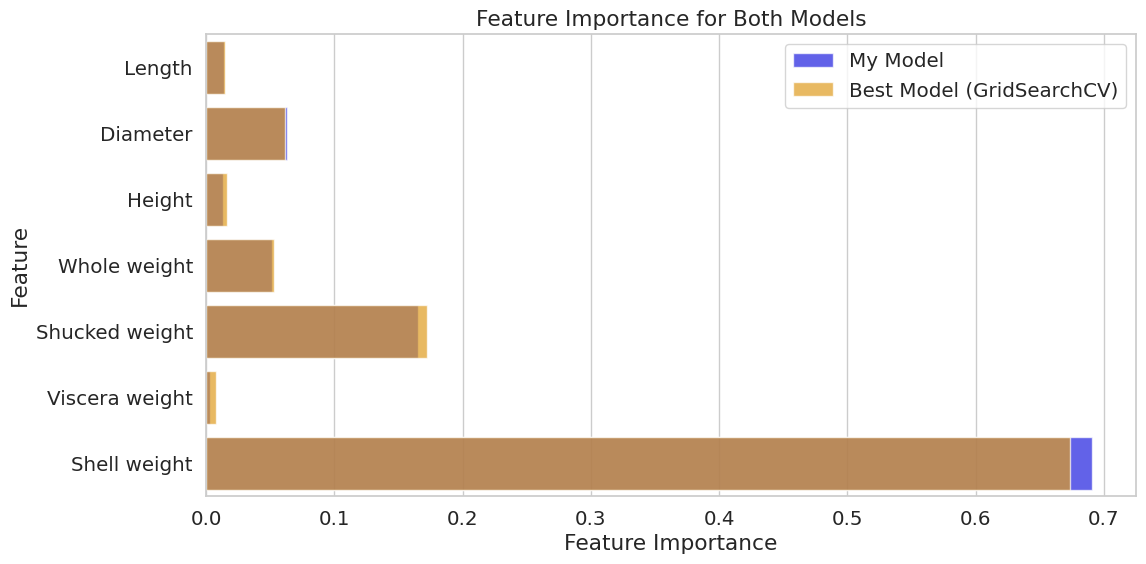

In [89]:
feature_important_my_tree = my_tree.feature_importances_
feature_important_best_model_gridsearch = best_model_gridsearch.feature_importances_

# Создаем DataFrame для удобства визуализации
df_importances = pd.DataFrame({
    'Feature': X.columns,
    'Your Model': feature_important_my_tree,
    'Best Model (GridSearchCV)': feature_important_best_model_gridsearch
})

plt.figure(figsize = (12, 6))

sns.barplot(data = df_importances, x = 'Your Model', y='Feature', color = 'blue', alpha = 0.7, label = 'My Model')
sns.barplot(data = df_importances, x = 'Best Model (GridSearchCV)', y = 'Feature', color = 'orange', alpha = 0.7, label = 'Best Model (GridSearchCV)')

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Both Models')

plt.legend()
plt.show()

Сделайте выводы. Объясните, согласуется ли логически, почему вес того или иного параметра так влияет на целевую переменную.

**Вывод:**

Исходя из значений важности признаков, можно сделать следующие выводы:

1. Параметр `'Shell weight'` имеет наибольшую важность, примерно 0.68. Это означает, что вес раковины является наиболее значимым признаком для определения возраста моллюсков. Это логично, так как раковина является одним из главных характеристик моллюска и его возраста.

2. Параметр `'Shucked weight'` имеет существенную важность, примерно 0.16. Это тоже вполне логично, поскольку вес мяса моллюска после удаления раковины также может быть сильным индикатором его возраста.

3. Остальные же параметры не играют большую роль в определнии возраста моллюска.

## Задача 4

Для данных из задачи 3 обучите случайный лес на 500 деревьев.

In [80]:
n_trees = 500
forest = RandomForestRegressor(n_estimators = n_trees)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

Посчитайте метрику на тестовой выборке.

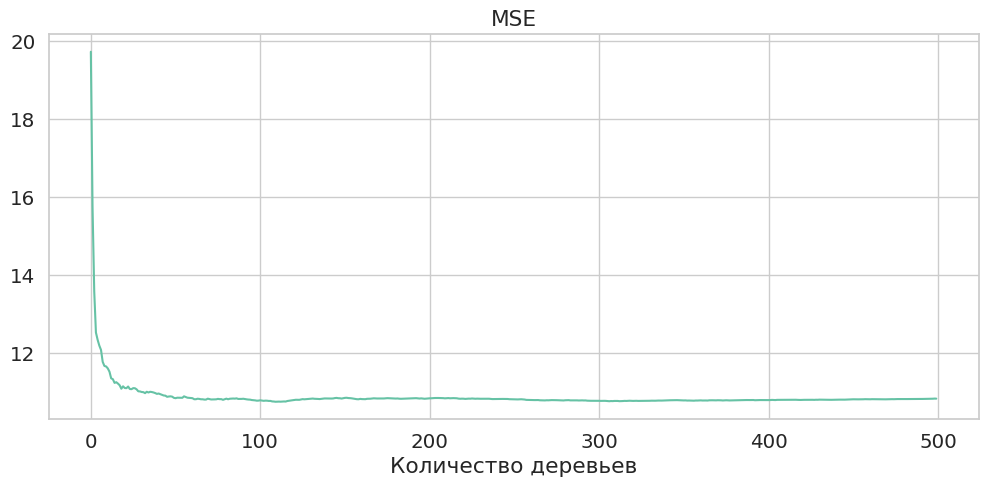

In [81]:
trees_pred = np.array([forest.estimators_[i].predict(X_test) for i in range(n_trees)]).reshape(-1, n_trees)
forest_pred = np.cumsum(trees_pred, axis = 1) / (np.arange(n_trees) + 1)

y_tests = np.repeat(np.array(y_test), n_trees).reshape(-1, n_trees)

mses =  mean_squared_error(y_tests, forest_pred, multioutput = 'raw_values')

plt.figure(figsize = (12, 5))

plt.title('MSE')
plt.xlabel('Количество деревьев')

plt.grid(True)
plt.plot(mses)
plt.show()

In [82]:
pred = forest.predict(X_test)
print('MSE:', mean_squared_error(y_test, pred).round(3))

MSE: 5.103


Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`.

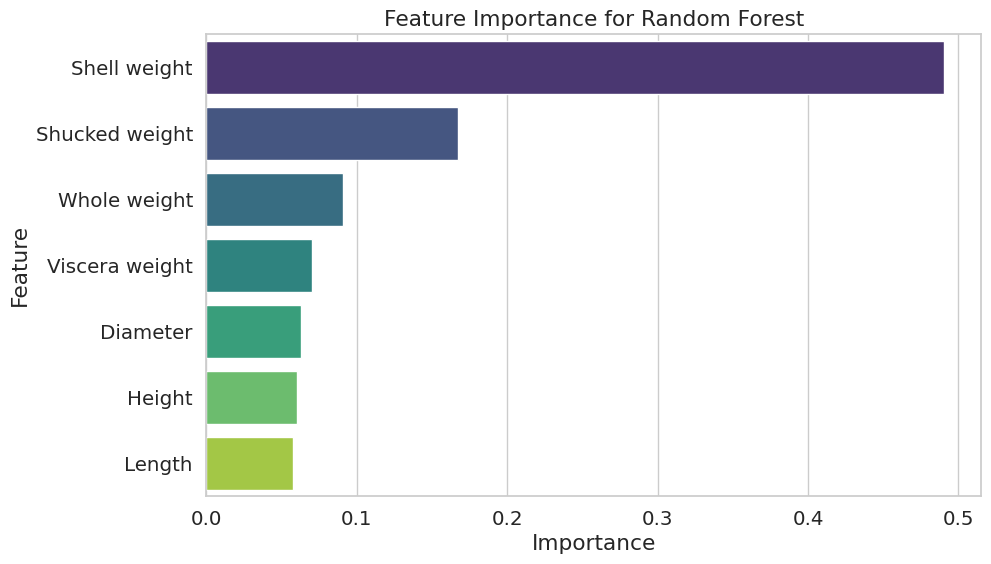

In [86]:
feature_important = forest.feature_importances_

df_importances_forest = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_important
})

df_importances_forest = df_importances_forest.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))

sns.barplot(x = 'Importance', y = 'Feature', data = df_importances_forest, palette = 'viridis')

plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.show()

Сделайте выводы.

**Вывод:**

1. Много деревьев в случайном лесу действительно помогают улучшить качество предсказаний. Мы наблюдали, что ошибка на обучающей и валидационной выборках продолжала снижаться с увеличением количества деревьев и не достигла плато даже на 500 деревьях. Это свидетельствует о том, что добавление еще большего числа деревьев может еще улучшить производительность модели.

2. Также мы заметили, что случайный лес использует больше признаков при предсказании, чем отдельное дерево решений, что позволяет модели лучше использовать информацию из данных.

3. Сравнение метрик ошибки MSE между случайным лесом и оптимальным деревом решений показало, что случайный лес демонстрирует лучшее качество предсказаний по сравнению с отдельным деревом решений. Это говорит о том, что сложные модели, такие как случайный лес, могут делать более точные прогнозы.